In [89]:
library(keras)

In [90]:
library(caret)

In [91]:
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [92]:
index<-createDataPartition(iris$Species,p=0.7,list=F)
Train_Features <- data.matrix(iris[index,-5])
Train_Labels <- iris[index,5]
Test_Features <- data.matrix(iris[-index,-5])
Test_Labels <- iris[-index,5]

In [93]:
to_categorical(as.numeric(Train_Labels))[,c(-1)] -> Train_Labels
to_categorical(as.numeric(Test_Labels))[,c(-1)] -> Test_Labels

In [94]:
summary(Train_Labels)

       V1               V2               V3        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3333   Mean   :0.3333   Mean   :0.3333  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

In [95]:
str(Train_Features)

 num [1:105, 1:4] 5.1 4.9 4.7 4.6 5 5.4 5 4.4 4.9 5.4 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:105] "1" "2" "3" "4" ...
  ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"


In [96]:
as.matrix(apply(Train_Features, 2, function(x) (x-min(x))/(max(x) - min(x)))) -> Train_Features
as.matrix(apply(Test_Features, 2, function(x) (x-min(x))/(max(x) - min(x)))) -> Test_Features

In [97]:
model <- keras_model_sequential()

In [98]:
model %>%
    layer_dense(units=10,activation = "relu",input_shape = ncol(Train_Features)) %>%
    layer_dense(units = 10, activation = "relu") %>%
    layer_dense(units = 3, activation = "softmax")
    


In [99]:
summary(model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_15 (Dense)                    (None, 10)                      50          
________________________________________________________________________________
dense_16 (Dense)                    (None, 10)                      110         
________________________________________________________________________________
dense_17 (Dense)                    (None, 3)                       33          
Total params: 193
Trainable params: 193
Non-trainable params: 0
________________________________________________________________________________


In [100]:
model %>% compile(loss = "categorical_crossentropy",
  optimizer = optimizer_adagrad(),
  metrics = c('accuracy')
)

In [101]:
history <- model %>% fit(Train_Features,Train_Labels,validation_split = 0.10,epochs=300,batch_size = 5,shuffle = T)

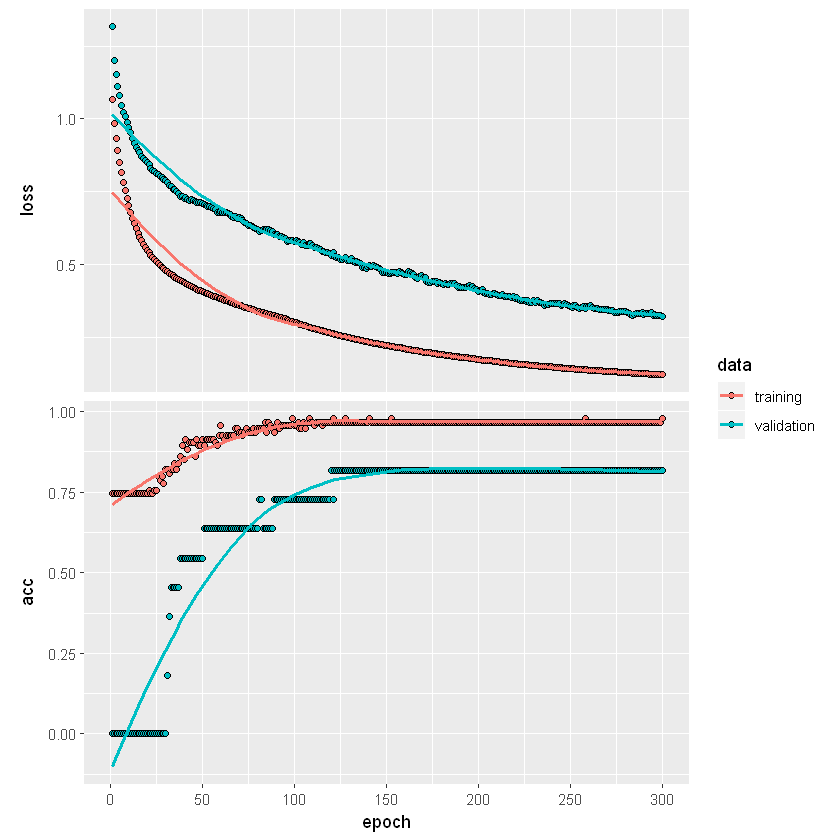

In [102]:
plot(history)

In [103]:
model %>% evaluate(Test_Features,Test_Labels)

$loss
[1] 0.1633494

$acc
[1] 0.9111111